# Barebone Climate Change Data Visualization

By Justin Wong, adapted from https://github.com/JustinRWong/IEOR185-Disruptive-Tech-and-Social-Impact/blob/master/2019_Fall/Climate%20Data.ipynb

## What We'll Go Cover

1. Imports
2. Using Real Data from Credible Sources
3. Parsing through the Data
4. Creating Purposeful Charts
5. Steps Going Forward

6. Live Bokeh Plots

## Objectives:

### Imports:
* Make sure you have all your imports installed.

    * Anything that isn't installed you can run pip install
    
* You import libraries because there are other functions created out there already that you can use.

* Before coding something up, check to see if the wheel is already invented.


### Data from Credible Sources:

*  There is A TON of data and picking the correct data, may seem obvious, but don't forget to check your sourcs, as with anything else.


### Creating Purposeful Charts:
* See what raw data looks like and how messy it may look initially.

* Understand that there are libraries that exist to help you create order from the mess.

    * Cleaning data is the more tedious and least fun part of data visualization and machine learning.
    
* In order for you to use the data, you need to keep track of what you're looking at.


## 1. Imports

* Other libraries have done work already.... Why reinvent the wheel?
* Makes work much more productive and save yourself time

In [69]:
## Fun imports!
import sys
import os
import zipfile

## Plotting libraries
import pandas as pd   # Dataframes and Series are basically 2d and 1d tables 
import matplotlib.pyplot as plt
import seaborn as sns

## Library for creating vectors and linear algebra manipulation
## For Least Squares
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Used for reading files. ds100_utils is from Data 100
from ds100_utils import * 

## Imports from ds100_utils
import requests
from pathlib import Path
import time

import matplotlib.cm as cm

## 2. Getting Started with NOAA Climate Data

NOAA is the National Oceanic and Atmospheric Administration under the US Department of Commerce. They essentially monitor the entire earth:

* Carbon emissions throughout different regions in the world

* Ocean levels

* Ocean temperatures

* Ocean and wind currents

* Pollution, etc.


We'll look at CO2 Emmissions data from two different sources.

### Data Sources and Files

Data comes in many different formats. Some common formats are:

* csv
* xml
* json
* xls

## Fetching your data


The hardest part is fetching and cleaning your data. Make sure your sources are providing credible data points. Stick with governmental data to be on the safe side.


### Climate Data Sources

* https://edgar.jrc.ec.europa.eu/overview.php?v=42

### Cool visualizations on

* https://www.esrl.noaa.gov/gmd/ccgg/trends/mlo.html

### Inspired by (A global dataset of CO2 emissions and ancillary data related to emissions for 343 cities):

* https://www.nature.com/articles/sdata2018280#data-citations

## 3. Let's Get Started: Parsing through CO2 Emissions

In [73]:
# Set up your sources and destination locations to download data from somewhere to somewhere on your computer
# Emissions by country and main source category

source_data_url = 'https://edgar.jrc.ec.europa.eu/download.php?edgar_dst=65163'
target_file_name = 'data.zip'

# Change the force=False -> force=True in case you need to force redownload the data
dest_path = fetch_and_cache(
    data_url=source_data_url, 
    data_dir='.', 
    file=target_file_name, 
    force=False)

Using cached version that was downloaded (UTC): Mon Sep 28 09:54:50 2020


In [4]:

# Create zip file (this does the actual download)
my_zip = zipfile.ZipFile(fetch_and_cache(source_data_url, target_file_name), 'r')


## Look at the size of each file.
## Do you really want all these files downloaded to your laptop?
file_names_and_size = [(info.filename, info.file_size) for info in my_zip.infolist()]
# file_names_and_size # UNCOMMENT to view the contents of file_names_and_size

## Set up your destination path (on your laptop) and download into foldre
data_dir = Path('data')
my_zip.extractall(data_dir)     # downloads into a folder called "data"

Downloading... Done!


In [6]:
!ls data

data.zip                     v4.2_CH4_1990.csv
v4.2_CH4_1970.csv            v4.2_CH4_1991.csv
v4.2_CH4_1971.csv            v4.2_CH4_1992.csv
v4.2_CH4_1972.csv            v4.2_CH4_1993.csv
v4.2_CH4_1973.csv            v4.2_CH4_1994.csv
v4.2_CH4_1974.csv            v4.2_CH4_1995.csv
v4.2_CH4_1975.csv            v4.2_CH4_1996.csv
v4.2_CH4_1976.csv            v4.2_CH4_1997.csv
v4.2_CH4_1977.csv            v4.2_CH4_1998.csv
v4.2_CH4_1978.csv            v4.2_CH4_1999.csv
v4.2_CH4_1979.csv            v4.2_CH4_2000.csv
v4.2_CH4_1980.csv            v4.2_CH4_2001.csv
v4.2_CH4_1981.csv            v4.2_CH4_2002.csv
v4.2_CH4_1982.csv            v4.2_CH4_2003.csv
v4.2_CH4_1983.csv            v4.2_CH4_2004.csv
v4.2_CH4_1984.csv            v4.2_CH4_2005.csv
v4.2_CH4_1985.csv            v4.2_CH4_2006.csv
v4.2_CH4_1986.csv            v4.2_CH4_2007.csv
v4.2_CH4_1987.csv            v4.2_CH4_2008.csv
v4.2_CH4_1988.csv            v4.2_CH4_tot_1970_2008.xls
v4.2_CH4_1989.csv            v42_CH4_sectors_overvi

In [85]:
file_names_and_size.sort()
years_tracked = len(file_names_and_size) - 3
# years_tracked = 1 # Uncomment if you only want to look at one file instead of all at once

dfYearLookup = {}

with my_zip as zip:
    ## include splicing on `file_names_and_size` to select only certain years
    for file_size_pair in file_names_and_size[:years_tracked]:
        fn = file_size_pair[0]
        fnpath = "data/" + fn
#         print(fn)
        
        cols = [i for i in range(61)]
        # Other libraries are made for these reasons.
        yearEmmissions = pd.read_csv(fnpath, skiprows=11, header=None, usecols=cols)  
        ## Notice that there are currently no column names.
#         display(yearEmmissions)     ##########
        
        
        
        # Extract the contents of the file into a list of the contents of yearTextualized.
        yearTextualized = whole_ISO(fnpath)
#         # Uncomment below to show yearTextualized neatly.
#         rowNum = 0
#         for r in yearTextualized:
#             row = r.split(',')
#             print(rowNum, " row has length: ", len(row))
#             print(row)
#             print()
#             rowNum+=1
        
    
        # From our observations about our data, first 10 columns, we'll call out `header`
        ## Actual data is the 11 through 61 columns
        header = yearTextualized[:11]
        data = yearTextualized[11:]
        
        # Uncomment below to see the contents of data.
#         dataRowNum = 12
#         for r in data:
#             if (dataRowNum != 246):
#                 row = r.split(',')[0:61]
#                 print(dataRowNum, ": ", len(row), row)
#                 print()
#             dataRowNum+=1

    
        ## From our header, we had some information about the vertical columns. 
        # We want to combine the somehow "merge" the two.
#         print("Row 8: ", header[8])
#         print("Row 10: ", header[10])
        
        ## Get titles from line 8 in the csv file and clean the quotes
        # Clean up quotes by getting rid of first and last literals/characters in the entire string
        colsTitles = header[8].split(',')[0:61] # convert the string into list split by delimiter
        colsTitles = [title[1:len(title) - 1] for title in colsTitles] # convert list to string array for column titles
        colsNum = header[10].split(',')[0:61]  # convert values columns into list using ',' deelimiter
        
        
        ## Merge the two xcel column titles
#         print("Before Merge: ", colsTitles) ##########
#         print()
        for i in [0,1,2]:
            title = colsNum[i]
            colsTitles[i] = str(title[1:len(title) - 1])
        colsTitles[60] = colsNum[60][1:len(colsNum[60])-3]
        # See the difference?
#         print("After Merge: ", colsTitles)  ##########
    
    
        ## View current status of dataframe
#         display(yearEmmissions)     ##########
        
        ## We want out column names to be representative of those numbers. 
        yearEmmissions.columns = colsTitles
        ## Print each column
#         for col in yearEmmissions.columns:
#             print(col)

        ## View current status of dataframe after setting the columns to our list of column names
#         display(yearEmmissions)     ##########
        
        
        ## ALL THE ABOVE WAS MINIMAL PARSING. 
        ## Now, in order for us to continue, we want to keep track of all the different years
        ## since we have 1970 through 2008.
        
        # First, let's find year and topic from the header
#         print(header)
#         for head in header:
#             print(type(head), head)
#             splitted = head.split(",")
#             for item in splitted:
#                 print(item)
        yearParse = header[2].split(',')
        entryYear = yearParse[1]
        year = entryYear[1:len(entryYear)-2]
        
        topicParse = header[0].split(',')
        entryContent = topicParse[1]
        content = entryContent[1:len(entryContent)-3]
        
        ## Create new column for year
        yearEmmissions['year'] = year
        
        
        # Store in our dictionary for quick look
        dfYearLookup[year] = yearEmmissions.sort_values(by='TOTAL', ascending=False)
        
        # View the entire dataframe
        print("CONFIRMED: ", content, " from ", year, "\n")
#         display(dfYearLookup[year])     ##########

CONFIRMED:  Emissions by country and main source category  from  1970 

CONFIRMED:  Emissions by country and main source category  from  1971 

CONFIRMED:  Emissions by country and main source category  from  1972 

CONFIRMED:  Emissions by country and main source category  from  1973 

CONFIRMED:  Emissions by country and main source category  from  1974 

CONFIRMED:  Emissions by country and main source category  from  1975 

CONFIRMED:  Emissions by country and main source category  from  1976 

CONFIRMED:  Emissions by country and main source category  from  1977 

CONFIRMED:  Emissions by country and main source category  from  1978 

CONFIRMED:  Emissions by country and main source category  from  1979 

CONFIRMED:  Emissions by country and main source category  from  1980 

CONFIRMED:  Emissions by country and main source category  from  1981 

CONFIRMED:  Emissions by country and main source category  from  1982 

CONFIRMED:  Emissions by country and main source category  from 

In [8]:
## Someone give me a year between 1970 and 2007
years = dfYearLookup.keys()
print("The years that have been parsed: ", years)

selectedYear = '1975'
# dfYearLookup[selectedYear]

The years that have been parsed:  dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007'])


## Emissions by country and main source category from 1970 - 2007

### Notice Your Data!

#### Features/Characteristics about our yearTextualized:

* Header is in the first 10 rows (Contains info Content, compound, year, unit of measureement, source, etc.)

* Row 8 has descriptive column titles.

* Row 10 looks like the vertical column names on xcel

* Data begins from Row 11 with Canada

* Row 245 is blank

* Row 246 is a summmary (TOTAL row

* Values are in scientific notation
                         
#### Features/Characteristics about our data:
                         

* Everything is a string, including the number values

* The numbers are ein scientific notation

#### Features/Characteristics about our header:

* Details about each of the csv files.

* Includes Content("Emissions by country and main source category"), year,

#### Features/Characteristics about our yearPD:

* Our temporary dataframe for the current year

* This data fram includes all the countries and main source categories, as well as a year column.

#### Features/Characteristics about our dfYearLookup:

* Our dictionary to find all the dataframes that we've created from the csv files

* This will keep track of our dataframes all in one place

#### Column Names:
* "Public electricity and heat production"
* "Other Energy Industries"
* "Manufacturing Industries and Construction"
* "Domestic aviation"
* "Road transportation"
* "Rail transportation"
* "Inland navigation"
* "Other transportation"
* "Residential and other sectors"
* "Fugitive emissions from solid fuels"
* "Fugitive emissions from oil and gas"
* "Memo: International aviation"
* "Memo: International navigation"
* "Cement production"
* "Lime production"
* "Production of other minerals"
* "Production of chemicals"
* "Production of metals"
* "Production of pulp/paper/food/drink"
* "Production of halocarbons and SF6"
* "Refrigeration and Air Conditioning"
* "Foam Blowing"
* "Fire Extinguishers"
* "Aerosols"
* "F-gas as Solvent"
* "Semiconductor/Electronics Manufacture"
* "Electrical Equipment"
* "Other F-gas use"
* "Non-energy use of lubricants/waxes (CO2)"
* "Solvent and other product use: paint"
* "Solvent and other product use: degrease"
* "Solvent and other product use: chemicals"
* "Solvent and other product use: other"
* "Enteric fermentation"
* "Manure management"
* "Rice cultivation"
* "Direct soil emissions"
* "* Manure in pasture/range/paddock"
* "Indirect N2O from agriculture"
* "Other direct soil emissions"
* "Savanna burning"
* "Agricultural waste burning"
* "Forest fires"
* "Grassland fires"
* "Peat fires and decay of drained peatland"
* "Other vegetation fires"
* "Other biomass burning"
* "Forest Fires-Post burn decay"
* "Forest Land: net carbon stock change"
* "Solid waste disposal on land"
* "Wastewater handling"
* "Waste incineration"
* "Other waste handling"
* "Fossil fuel fires"
* "Indirect N2O from non-agricultural NOx"
* "Indirect N2O from non-agricultural NH3"
* "Other sources"

In [88]:
## Example lookup into the dictionary `dfYearLookup` that contains all our dataframes 
## India's Carbon Emissions by activities/sources in 1970
y = '1985'
sampleYear = dfYearLookup[y]
sampleYear

,World Region,ISO_A3,Country,Public electricity and heat production,Other Energy Industries,Manufacturing Industries and Construction,Domestic aviation,Road transportation,Rail transportation,Inland navigation,...,Solid waste disposal on land,Wastewater handling,Waste incineration,Other waste handling,Fossil fuel fires,Indirect N2O from non-agricultural NOx,Indirect N2O from non-agricultural NH3,Other sources,TOTAL,year
234,TOTALS,NaN,NaN,75.019900,31.347600,339.182000,1.601330,706.101000,8.009680e+00,10.461900,...,23436.300000,21465.000000,241.479000,2.877430,150.6,0,0,0,287593.000000,1985
185,China +,CHN,China,3.096880,1.327550,62.973000,0.012540,15.386800,9.202580e-01,0.000000,...,717.847000,4871.310000,5.455390,0.000000,90.0,0,0,0,43267.300000,1985
3,USA,USA,United States,15.822400,6.925910,80.297500,1.179550,216.346000,1.812930e+00,1.367790,...,8198.770000,701.455000,0.000000,0.000000,15.0,0,0,0,28660.500000,1985
160,Russia +,RUS,Russian Federation,8.417500,1.025940,15.787300,0.000000,36.320400,1.841910e+00,2.913440,...,1019.250000,1166.890000,0.000000,0.000000,0.0,0,0,0,25752.000000,1985
177,India +,IND,India,1.347020,0.277457,9.048650,0.000000,9.730920,5.595000e-01,0.119282,...,431.067000,2793.030000,0.000000,0.000000,45.0,0,0,0,22878.000000,1985
37,Brazil,BRA,Brazil,0.918765,8.703810,27.098900,0.038895,10.806300,1.046990e-01,0.765807,...,401.999000,1288.060000,5.381410,0.000000,0.0,0,0,0,13187.300000,1985
200,Indonesia +,IDN,Indonesia,0.111448,0.360273,0.769115,0.006510,5.511210,1.674720e-03,0.054219,...,234.447000,747.767000,3.247070,0.000000,0.0,0,0,0,7944.860000,1985
143,Central Europe,POL,Poland,2.331880,0.337829,3.508520,0.000000,5.403100,1.651150e-01,0.042496,...,289.218000,130.839000,0.289849,0.000000,0.0,0,0,0,6511.680000,1985
113,OECD_Europe,DEU,Germany,7.181390,0.704664,8.763020,0.021227,44.269300,2.215470e-01,0.220394,...,1605.470000,180.994000,0.000000,0.000000,0.0,0,0,0,5994.260000,1985
119,OECD_Europe,GBR,United Kingdom,1.333530,0.826026,4.026010,0.042475,35.581100,1.339570e-01,0.349933,...,2486.490000,117.374000,8.085500,0.000000,0.0,0,0,0,5579.360000,1985


In [91]:

sampleCountry = 'India'
sampleCountryYear = sampleYear[sampleYear['Country']==sampleCountry]

## Extract the top 10 categories from 1970 for sampleCountry
sampleCountryYearStacked = sampleCountryYear.stack()[3:61]
sampleCountryYearSorted = sampleCountryYearStacked.sort_values(axis=0, ascending=False)
sampleTopTen = sampleCountryYearSorted[:11].unstack()
sampleCategories = sampleTopTen.columns

print(sampleCountry, " top 10 C02 Emitters: ", sampleCategories)

India  top 10 C02 Emitters:  Index(['TOTAL', 'Enteric fermentation', 'Rice cultivation',
       'Wastewater handling', 'Residential and other sectors',
       'Fugitive emissions from solid fuels', 'Manure management',
       'Solid waste disposal on land', 'Fugitive emissions from oil and gas',
       'Agricultural waste burning', 'Forest fires'],
      dtype='object')


## 3. Purposeful Plots

We plot to reveal something about our data. But instead of diving straight into it, start with something you want to find out.

### What are some questions you might have about climate data(carbon emissions)?

The data has info about <strong>Mall countries that recorded the quantity of carbon emissions from a variety of sources from 1970 - 2007</strong>.

* ...


#### Picture of Huskies dragging a sled in 90 degree weather in greenland

![Doggies](https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F20%2F2019%2F06%2Frexfeatures_10315185b.jpg)

To get started, let's go with

* How has the top 10 carbon emmission activities from the 1970s changed over time?
* Are we able to find some correlation with the top 10 carbon emitters and increasd chances of that being reduced and is this the same across multiple countries?

In [93]:
# We will track the top 10(including overall total) from 1970 to 2007.
# To generalize, we can do this for any country. 
country = 'India'
bigDF = [] ## List that will continously be built to each of the rows in our dataframe

for year in years:
    df = dfYearLookup[year]
    row = {}
    row['Year'] = year
    dataRow = df[df['Country']==country]
    
    ## Extract the top 10 categories from the year
    countryYearStacked = dataRow.stack()[3:61]
    sortedStack = countryYearStacked.sort_values(axis=0, ascending=False)
    topTen = sortedStack[:11].unstack()
    categories = topTen.columns
    
    for cat in categories:
        match = df[df['Country']==country][cat]
#         print(cat, " : ",  match.values)
#         print()
        row[cat] = match.values[0]
        
        
    bigDF.append(row)
#     print()
#     print()

bigDF[0]
bigDF = pd.DataFrame(bigDF)
bigDF

,Agricultural waste burning,Enteric fermentation,Forest fires,Fossil fuel fires,Fugitive emissions from oil and gas,Fugitive emissions from solid fuels,Manufacturing Industries and Construction,Manure management,Other waste handling,Residential and other sectors,Rice cultivation,Solid waste disposal on land,TOTAL,Wastewater handling,Year
0,157.595,8510.19,69.8496,NaN,52.5768,813.120,NaN,755.915,NaN,1166.40,5138.17,224.160,18962.5,1994.14,1970
1,154.519,8614.93,69.8496,NaN,52.5688,811.677,NaN,768.382,NaN,1183.11,5106.50,234.409,19115.9,2039.54,1971
2,147.170,8711.36,69.8496,NaN,50.6446,855.999,NaN,780.455,NaN,1197.84,4900.63,244.994,19125.6,2085.36,1972
3,159.205,8774.06,69.8496,NaN,54.2468,837.744,NaN,778.669,NaN,1234.29,5054.50,255.379,19432.7,2133.53,1973
4,151.773,8886.10,69.8496,NaN,62.1806,915.790,NaN,788.835,NaN,1245.06,4942.55,266.196,19592.5,2182.87,1974
5,167.184,8971.26,69.8496,NaN,70.7139,1007.220,NaN,795.401,NaN,1275.81,5089.56,277.175,20040.6,2234.31,1975
6,158.831,9106.08,69.8496,NaN,73.3065,1002.140,NaN,807.004,NaN,1290.28,4900.61,289.298,20069.1,2288.69,1976
7,173.473,9214.40,69.8496,NaN,83.1122,962.287,NaN,817.047,NaN,1325.13,5066.84,301.648,20440.5,2343.05,1977
8,177.355,9383.88,69.8496,NaN,87.2039,911.084,NaN,831.753,NaN,1340.58,5028.77,315.187,20629.5,2400.19,1978
9,161.999,9594.16,69.8496,NaN,91.3881,900.732,NaN,852.510,NaN,1372.42,4830.70,329.637,20741.5,2453.71,1979


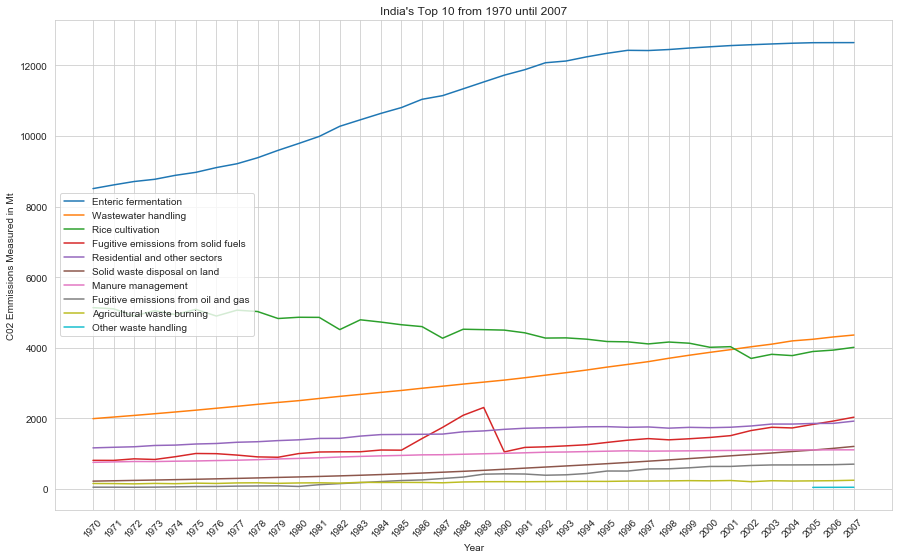

In [101]:
# # Plotting on a scatter plot of the top 10 carbo emitters from 1970 tracked over time
plt.figure(figsize=(15, 9))
sns.set_style("whitegrid")
sns.set_style({"xtick.major.size":30, "ytick.major.size":12})

## if TOTAL is included, we have a big axis gap.
for cat in categories:
    if (cat != "TOTAL" ):
        sns.lineplot(x='Year', y=cat, data=bigDF, label=cat)
        
for year in years:
    df = dfYearLookup[year]
    row = {}
    row['Year'] = year
    dataRow = df[df['Country']==country]
    
    ## Extract the top 10 categories from the year
    countryYearStacked = dataRow.stack()[3:61]
    sortedStack = countryYearStacked.sort_values(axis=0, ascending=False)
    topTen = sortedStack[:11].unstack() ## change 11 to some other vlaue 
    categories = topTen.columns
    
    for cat in categories:
        match = df[df['Country']==country][cat]
#         print(cat, " : ",  match.values)
#         print()
        row[cat] = match.values[0]


plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel("C02 Emmissions Measured in Mt")
plt.title(country + "'s Top 10 from 1970 until 2007")
plt.legend(loc="center left")

In [95]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool

In [96]:
tools = "hover, box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter(sampleYear.loc[:,"Enteric fermentation"], sampleYear.loc[:,"Rice cultivation"], alpha=0.5)
show(p)

In [97]:
all_years_and_countries = pd.concat([dfYearLookup[y] for y in years])
india_over_time = all_years_and_countries[all_years_and_countries['Country']=='India']
datetime_years = pd.to_datetime(india_over_time['year'], format='%Y')
india_over_time.index = pd.DatetimeIndex(datetime_years).year
india_over_time


,World Region,ISO_A3,Country,Public electricity and heat production,Other Energy Industries,Manufacturing Industries and Construction,Domestic aviation,Road transportation,Rail transportation,Inland navigation,...,Solid waste disposal on land,Wastewater handling,Waste incineration,Other waste handling,Fossil fuel fires,Indirect N2O from non-agricultural NOx,Indirect N2O from non-agricultural NH3,Other sources,TOTAL,year
year,,,,,,,,,,,,,,,,,,,,,
1970,India +,IND,India,0.284477,0.122869,4.34079,0.0,5.72595,0.745020,0.087337,...,224.160,1994.14,0.0,0.00000,39.42,0,0,0,18962.5,1970
1971,India +,IND,India,0.284477,0.122868,4.34079,0.0,5.72595,0.745020,0.087337,...,234.409,2039.54,0.0,0.00000,39.78,0,0,0,19115.9,1971
1972,India +,IND,India,0.314993,0.114250,4.42704,0.0,5.99577,0.728987,0.064184,...,244.994,2085.36,0.0,0.00000,40.14,0,0,0,19125.6,1972
1973,India +,IND,India,0.326691,0.113822,4.41979,0.0,5.77301,0.676460,0.054512,...,255.379,2133.53,0.0,0.00000,40.50,0,0,0,19432.7,1973
1974,India +,IND,India,0.395383,0.127059,5.03856,0.0,5.14251,0.683773,0.051288,...,266.196,2182.87,0.0,0.00000,40.86,0,0,0,19592.5,1974
1975,India +,IND,India,0.438525,0.123603,5.56736,0.0,5.23498,0.706463,0.063304,...,277.175,2234.31,0.0,0.00000,41.22,0,0,0,20040.6,1975
1976,India +,IND,India,0.509152,0.131035,5.93726,0.0,5.41483,0.674206,0.064770,...,289.298,2288.69,0.0,0.00000,41.58,0,0,0,20069.1,1976
1977,India +,IND,India,0.499295,0.141787,6.24356,0.0,5.74443,0.670400,0.056857,...,301.648,2343.05,0.0,0.00000,41.94,0,0,0,20440.5,1977
1978,India +,IND,India,0.508480,0.124611,5.77673,0.0,6.20875,0.614650,0.057736,...,315.187,2400.19,0.0,0.00000,42.30,0,0,0,20629.5,1978


## Using Bokeh for Interactive Plots

In [98]:
special_hover = HoverTool(tooltips=[('ef', '@Enteric fermentation')], formatters={'ef':'numeral'}, point_policy='follow_mouse')



In [99]:
p = figure(tools=tools, x_axis_label='Year', y_axis_label='Rice cultivation')

hover = p.select(dict(type=HoverTool))
hover.tooltips = [('Date', '$x'), ('Rice cultivation','$y')]
p.scatter(x=india_over_time.loc[:,"year"], y=india_over_time.loc[:,"Rice cultivation"], alpha=0.5)
p.scatter(x=india_over_time.loc[:,"year"], y=india_over_time.loc[:,"Enteric fermentation"], alpha=0.5, color='red')

## display everything
# for c in india_over_time_over_time.columns: 
#     x = np.arange(10)
#     ys = [i+x+(i*x)**2 for i in range(10)]
#     colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    
show(p)

